# 이미지 분류 (합성곱 신경망, CNN)
---
- fashion mnist 데이터셋

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## 데이터 준비

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

## 시각화

In [ ]:
samples = np.random.randint(60000, size=9)
samples

array([16902, 57426, 52731, 38824, 52153,  8855, 46368,  5632,  3711])

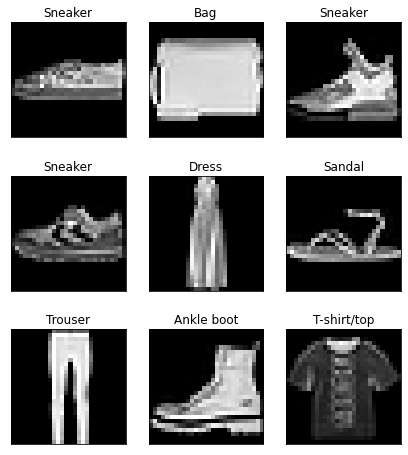

In [ ]:
plt.figure(figsize=(7,8))
for i, idx in enumerate(samples):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title(class_name[y_train[idx]])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 검증용 데이터 (Validation Data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.3)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


## 정규화

In [ ]:
X_train = X_train.astype('float32')/255
X_val = X_val/255.
X_test = X_test/255.

In [ ]:
np.min(X_train),np.max(X_train)

(0.0, 1.0)

In [ ]:
y_train[:10]

array([5, 6, 4, 0, 0, 7, 3, 7, 3, 9], dtype=uint8)

In [ ]:
# One Hot Encoding(Multi-Classification)

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_val_oh = to_categorical(y_val)

## 모델

In [ ]:
X_train.shape

(42000, 28, 28)

In [ ]:
X_train=X_train.reshape(-1,28,28,1) #image net, coco data 질문!
X_train.shape

(42000, 28, 28, 1)

In [ ]:
X_val = X_val.reshape(-1,28,28,1) # 흑백으로 바꾸는 것도 아니고 채널을 왜 1로 바꾼다구??  
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
# Sequential 생성할 때, 레이어 동시 지정정
def build_model_1():


    model = keras.Sequential([
        layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu',
                    input_shape = (28,28,1)),# 제일중요한 input_shape, 이녀석은 3차원을 집어넣음(x, y, channel 수)
        layers.MaxPool2D(pool_size = (2,2)),

        layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'), # 왜 32 다음에 64로 올라감?? 필터를 처음에 적게넣고 나중에 많이넣는 이유가?
        layers.MaxPool2D(pool_size = (2,2)),

        layers.Flatten(),

        layers.Dense(units = 32, activation ='relu'),
        layers.Dense(units = 10, activation ='softmax') # 왜 10?
    ])
    # Model Compile
    
    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['acc'] # 분류니까 accuracy
    )

    return model

model = build_model_1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [ ]:
EPOCHS = 5
BATCH_SIZE = 32

log = model.fit(X_train, y_train_oh,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data = (X_val, y_val_oh),
                verbose=1)

Epoch 1/5
1313/1313 [==============================] - 99s 75ms/step - loss: 0.5504 - acc: 0.7999 - val_loss: 0.3819 - val_acc: 0.8644
Epoch 2/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.3618 - acc: 0.8703 - val_loss: 0.3478 - val_acc: 0.8738
Epoch 3/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.3136 - acc: 0.8861 - val_loss: 0.3068 - val_acc: 0.8882
Epoch 4/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.2825 - acc: 0.8977 - val_loss: 0.2883 - val_acc: 0.8944
Epoch 5/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.2585 - acc: 0.9058 - val_loss: 0.2886 - val_acc: 0.8943


In [ ]:
# 학습 곡선

def plot_history(history):
    # 학습 history를 DataFrame 타입으로 변환
    hist = pd.DataFrame(history.history)
    # epoch 1~50 이라는 단계별로 컬럼 하나를 만들어준다.
    hist['epoch'] = history.epoch

    # 그래프 1
    # Loss 값 비교(Train, Val)
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    # 그래프 2
    # Accracy 값 비교(Train, Val)
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

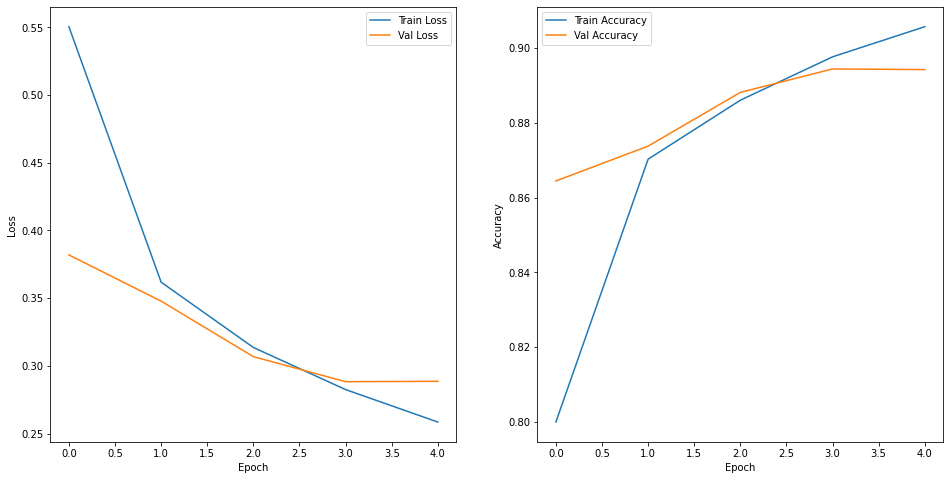

In [ ]:
plot_history(log)

## 모델 평가

In [ ]:
model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 19s 14ms/step - loss: 0.2447 - acc: 0.9083


[0.24470072984695435, 0.9082857370376587]

In [ ]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 4s 11ms/step - loss: 0.3118 - acc: 0.8881


[0.3117578327655792, 0.8881000280380249]

## 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 4s 11ms/step


array([[3.19710598e-05, 1.36872652e-04, 1.68599638e-06, ...,
        1.11989230e-02, 5.64809779e-05, 9.67847705e-01],
       [2.20689162e-05, 3.41828148e-08, 9.99421000e-01, ...,
        1.20673110e-10, 6.76941738e-08, 4.81864592e-12],
       [2.55133500e-07, 9.99997675e-01, 1.69295777e-08, ...,
        1.21179719e-10, 2.43154350e-08, 9.58458313e-12],
       ...,
       [8.89502931e-04, 2.25177746e-06, 4.74214939e-05, ...,
        1.30537945e-08, 9.97518957e-01, 1.50998003e-09],
       [5.79716016e-07, 9.99887288e-01, 4.30544247e-07, ...,
        1.34289735e-07, 1.35181864e-07, 4.60113867e-08],
       [3.98256397e-03, 2.91447854e-03, 1.34624494e-03, ...,
        1.17487714e-01, 3.77662964e-02, 8.94554134e-04]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis =1)

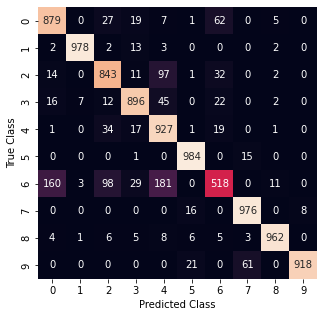

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cfm, fmt='d',annot =True, cbar = False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# 오답 이미지 시각화
---
- 못 맞춘 데이터를 뽑아서 그중에 9개만 맞춰봅시다.

In [ ]:
samples = np.where((y_test == y_pred) == False)[0]
samples = np.random.choice(samples, 9)
samples

array([2948,  406, 4672, 8142,  394, 1300,  474, 7442, 8061])

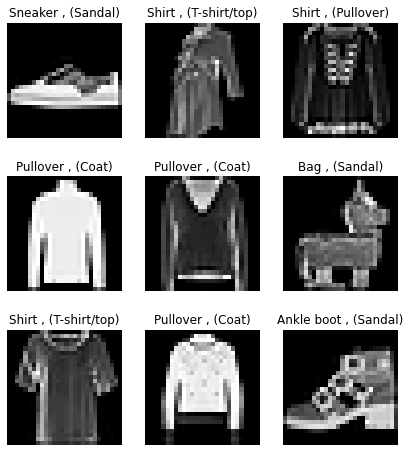

In [ ]:
plt.figure(figsize=(7,8))
for i, idx in enumerate(samples):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap = 'gray') #X_test 원래대로 돌려야지 됩니다.
    plt.axis('off')
    plt.title(f'{class_name[y_test[idx]]} , ({class_name[y_pred[idx]]})')
plt.show()

### 모델 2

In [ ]:
# Sequential 생성할 때, 레이어 동시 지정정
def build_model_2():


    model = keras.Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units = 32, activation ='relu'))
    model.add(layers.Dense(units = 10, activation ='softmax'))

    # Model Compile
    
    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['acc'] # 분류니까 accuracy
    )

    return model

model = build_model_2()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 32)               

### 함수형 API
- Sequential로 만들 수 없는 모델을 만들 경우 사용용

In [ ]:
def build_model_3():
    inputs = layers.Input(shape=(28, 28, 1))
    x1 = layers.Conv2D(filters=32, kernel_size=3,
                       activation="relu")(inputs)
    x2 = layers.MaxPool2D(pool_size=(2, 2))(x1)
    x3 = layers.Conv2D(filters=32, kernel_size=3,
                       activation="relu")(x2)
    x4 = layers.MaxPool2D(pool_size=(2, 2))(x3)
    x5 = layers.Flatten()(x4)
    x6 = layers.Dense(units=32, activation="relu")(x5)
    outputs = layers.Dense(units=10, activation="softmax")(x6)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["acc"]
    )
    return model

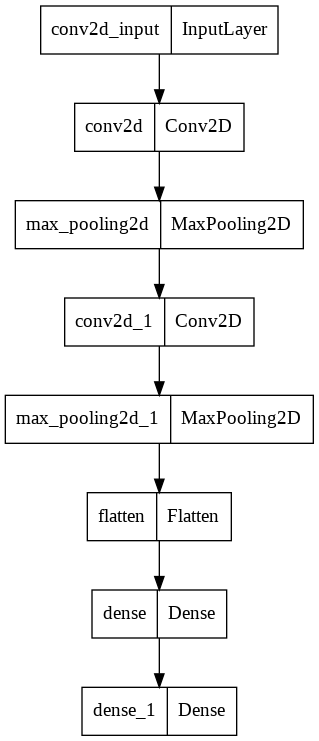

In [ ]:
tf.keras.utils.plot_model(model)

### 입력이 2개인 임의의 모델

In [ ]:
input_x = layers.Input(shape=(16,))
x1 = layers.Dense(8, activation="relu")(input_x)
x2 = layers.Dense(16, activation="relu")(x1)
x3 = Model(inputs=input_x, outputs=x2)

input_y = layers.Input(shape=(16,))
x4 = layers.Dense(8, activation="relu")(input_y)
x5 = layers.Dense(16, activation="relu")(x4)
x6 = Model(inputs=input_y, outputs=x5)

# 합치기
combined = layers.concatenate([x3.output, x6.output])
z1 = layers.Dense(2, activation="relu")(combined)
z2 = layers.Dense(1)(z1)

model = Model(inputs=[x3.input, x6.input], outputs=z2)

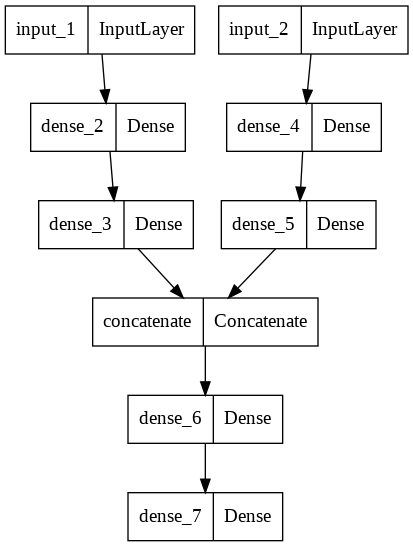

In [ ]:
tf.keras.utils.plot_model(model)

### 서브클래싱(subclassing)
- 모델을 클래스로 만드는 것

In [ ]:
class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.conv1 = layers.Conv2D(64, 3, activation="relu")
        self.conv2 = layers.Conv2D(32, 3, activation="relu")
        self.maxpool = layers.MaxPool2D(2)
        self.flat = layers.Flatten()
        self.dense1 = layers.Dense(32, activation="relu")
        self.dense2 = layers.Dense(10, activation="softmax")

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = self.flat(x)
        x = self.dense1(x)
        output = self.dense2(x)
        return output

In [ ]:
model = MnistModel()